In [2]:
from urllib.request import urlretrieve
import os
from pathlib import Path
import kaggle
import pandas as pd
import numpy as np

In [ ]:
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json

# api_token = {"username":"username","key":"api-key"}

# import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files("sachinpatel21/az-handwritten-alphabets-in-csv-format", path='../data/', unzip=True)

In [3]:
df = pd.read_csv("../data/A_Z Handwritten Data.csv")

In [ ]:
x = df.iloc[0]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img = x[:-1].values.reshape(28,28)

In [ ]:
plt.imshow(img, cmap="gray")

In [30]:
import matplotlib.pyplot as plt

In [38]:
img = x[:-1].values.reshape(28,28)

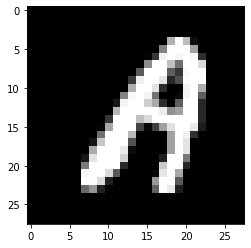

In [41]:
plt.imshow(img, cmap="gray")

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [30]:
X, y = df.drop(columns=[df.columns[0]]).values, df[df.columns[0]].values

In [32]:
X.shape

(372450, 784)

In [33]:
y.shape

(372450,)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [46]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)

In [47]:
for train, test in sss.split(X, y):
    x_train, x_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

In [48]:
x_train.shape

(279337, 784)

In [49]:
x_test.shape

(93113, 784)

In [50]:
y_train.shape

(279337,)

In [51]:
y_test.shape

(93113,)

# Model Creation

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
rf.score(x_test, y_test)

0.9852866946613255

In [56]:
rf.score(x_train, y_train)

1.0

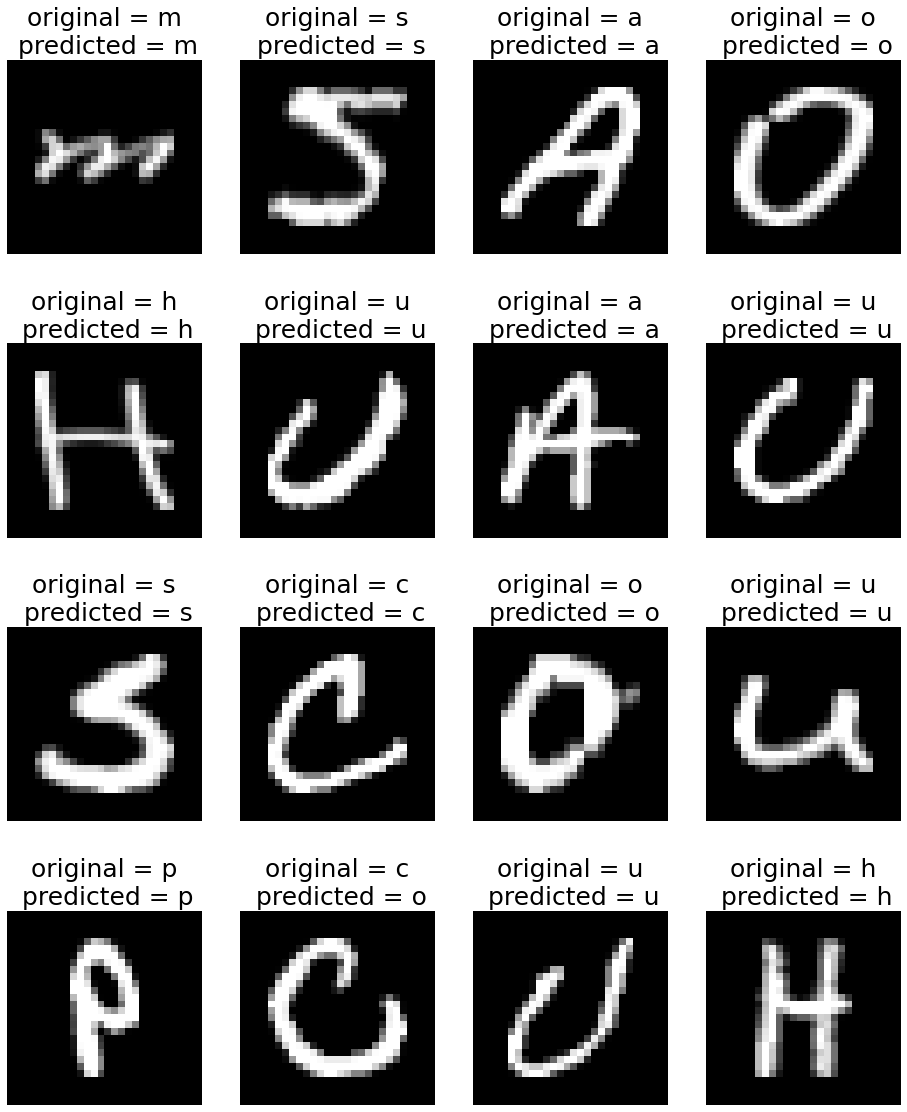

In [83]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,4, figsize=(16,20))
count = 0
alphabets = [chr(i+ord('a')) for i in range(26)]
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(x_test[count].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"original = {alphabets[y_test[count]]}\n predicted = {alphabets[rf.predict([x_test[count]])[0]]}", fontsize=25)
        ax[i,j].axis("off")
        count += 1

In [89]:
img = plt.imread("../custom-images/p.jpeg")

In [90]:
img.shape

(252, 273, 3)

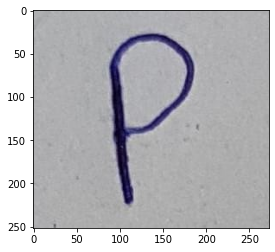

In [94]:
plt.imshow(img)

In [95]:
import cv2

In [117]:
img = cv2.imread("../custom-images/p.jpeg")

In [118]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

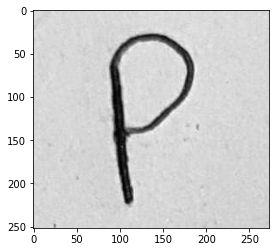

In [119]:
plt.imshow(img_gray, cmap="gray")

In [120]:
img_resized = cv2.resize(img_gray, (28,28))

In [121]:
img_resized.shape

(28, 28)

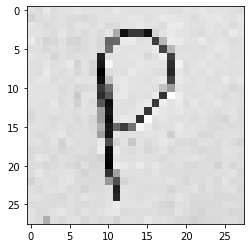

In [122]:
plt.imshow(img_resized, cmap="gray")

In [127]:
img_thresh = cv2.threshold(img_resized, 120, 255, cv2.THRESH_BINARY)[1]

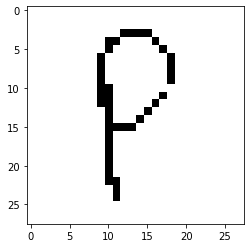

In [130]:
plt.imshow(img_thresh, cmap="gray")

In [131]:
alphabets[rf.predict([img_thresh.reshape(784,)])[0]]

'o'